# Deep Learning
Deep learning is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain. Deep learning models can recognize complex patterns in pictures, text, sounds, and other data to produce accurate insights and predictions.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Building simple Neural network

In [2]:
#loading handwritten digits Dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape
#there are 60000 sample in the x_train each consisting of 28*28 pixels

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

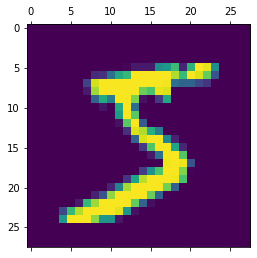

In [8]:
#plotting an image
plt.matshow(x_train[0])
plt.show()

In [9]:
#checking its corresponding value
y_train[0]

5

In [10]:
#flattening 28*28 pixels to 784 pixels
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flattened.shape#now the shape is flattened , previously it was (60000,28,28)

(60000, 784)

**Single Layer**

In [12]:
#Building neural network with single layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')#10 is an output shape
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 10.0069 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.1004 - accuracy: 0.8771
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.7082 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4685 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4236 - accuracy: 0.8861


Here we can observe that accuracy is 88 but we can improve it further more by scaling the values

In [13]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [14]:
#flattening 28*28 pixels to 784 pixels
x_train_scaled_flattened=x_train_scaled.reshape(len(x_train),28*28)
x_test_scaled_flattened=x_test_scaled.reshape(len(x_test),28*28)

In [15]:
#Now again building a neural network with single layer
model2=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train_scaled_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4642 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3040 - accuracy: 0.9163
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2666 - accuracy: 0.9254


In [16]:
model2.evaluate(x_test_scaled_flattened,y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.9271


[0.26684463024139404, 0.9271000027656555]

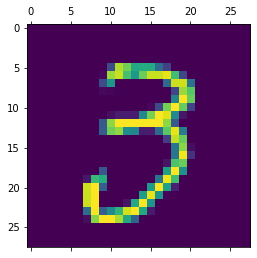

In [41]:
plt.matshow(x_test[369])

In [39]:
y_predicted=model2.predict(x_test_scaled_flattened)

313/313 [==============================] - 1s 2ms/step


In [42]:
#predicting the value of 369 th image
y_predicted[369]

array([1.5845418e-01, 3.8855473e-04, 1.3846637e-02, 9.9221075e-01,
       1.0486588e-02, 7.2093570e-01, 4.7847116e-06, 1.4016634e-01,
       4.5283997e-01, 2.5454608e-01], dtype=float32)

In [43]:
#argmax returns the index of the maximum value in an array
np.argmax(y_predicted[369])

3

In [44]:
#converting y_predicted (array of 10 values i.e. value of each output value) into single value 
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
#plotting confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    0,    2,    0,    7,    9,    2,    4,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  924,   15,    6,    4,   13,   11,   42,    5],
       [   2,    0,   21,  913,    0,   25,    3,   11,   25,   10],
       [   1,    1,    3,    1,  897,    0,   12,    4,   10,   53],
       [   8,    3,    2,   27,    6,  780,   20,    3,   35,    8],
       [   7,    3,    5,    1,    7,    7,  923,    2,    3,    0],
       [   1,    5,   21,    5,    6,    1,    0,  941,    4,   44],
       [   4,    6,    6,   15,    8,   22,   11,    9,  883,   10],
       [   8,    7,    2,    8,   13,    6,    0,   10,    9,  946]])>

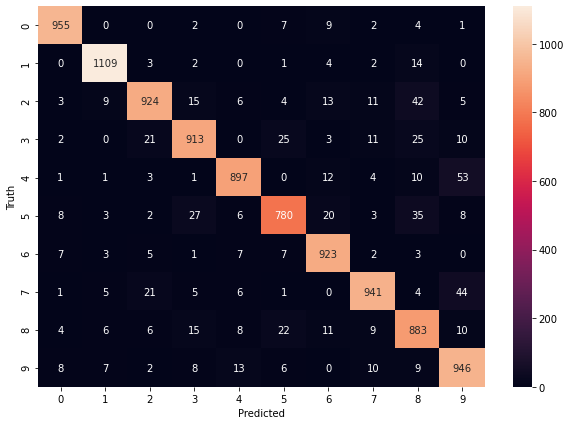

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

**Double Layer**

In [52]:
model3=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(x_train_scaled_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2770 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1261 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9843


In [53]:
model3.evaluate(x_test_scaled_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0751 - accuracy: 0.9763


[0.07509418576955795, 0.9763000011444092]

In [54]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [56]:
#Direct process without flattening x_train and x_test
model4=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model4.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2774 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1267 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9834


# Activation Function

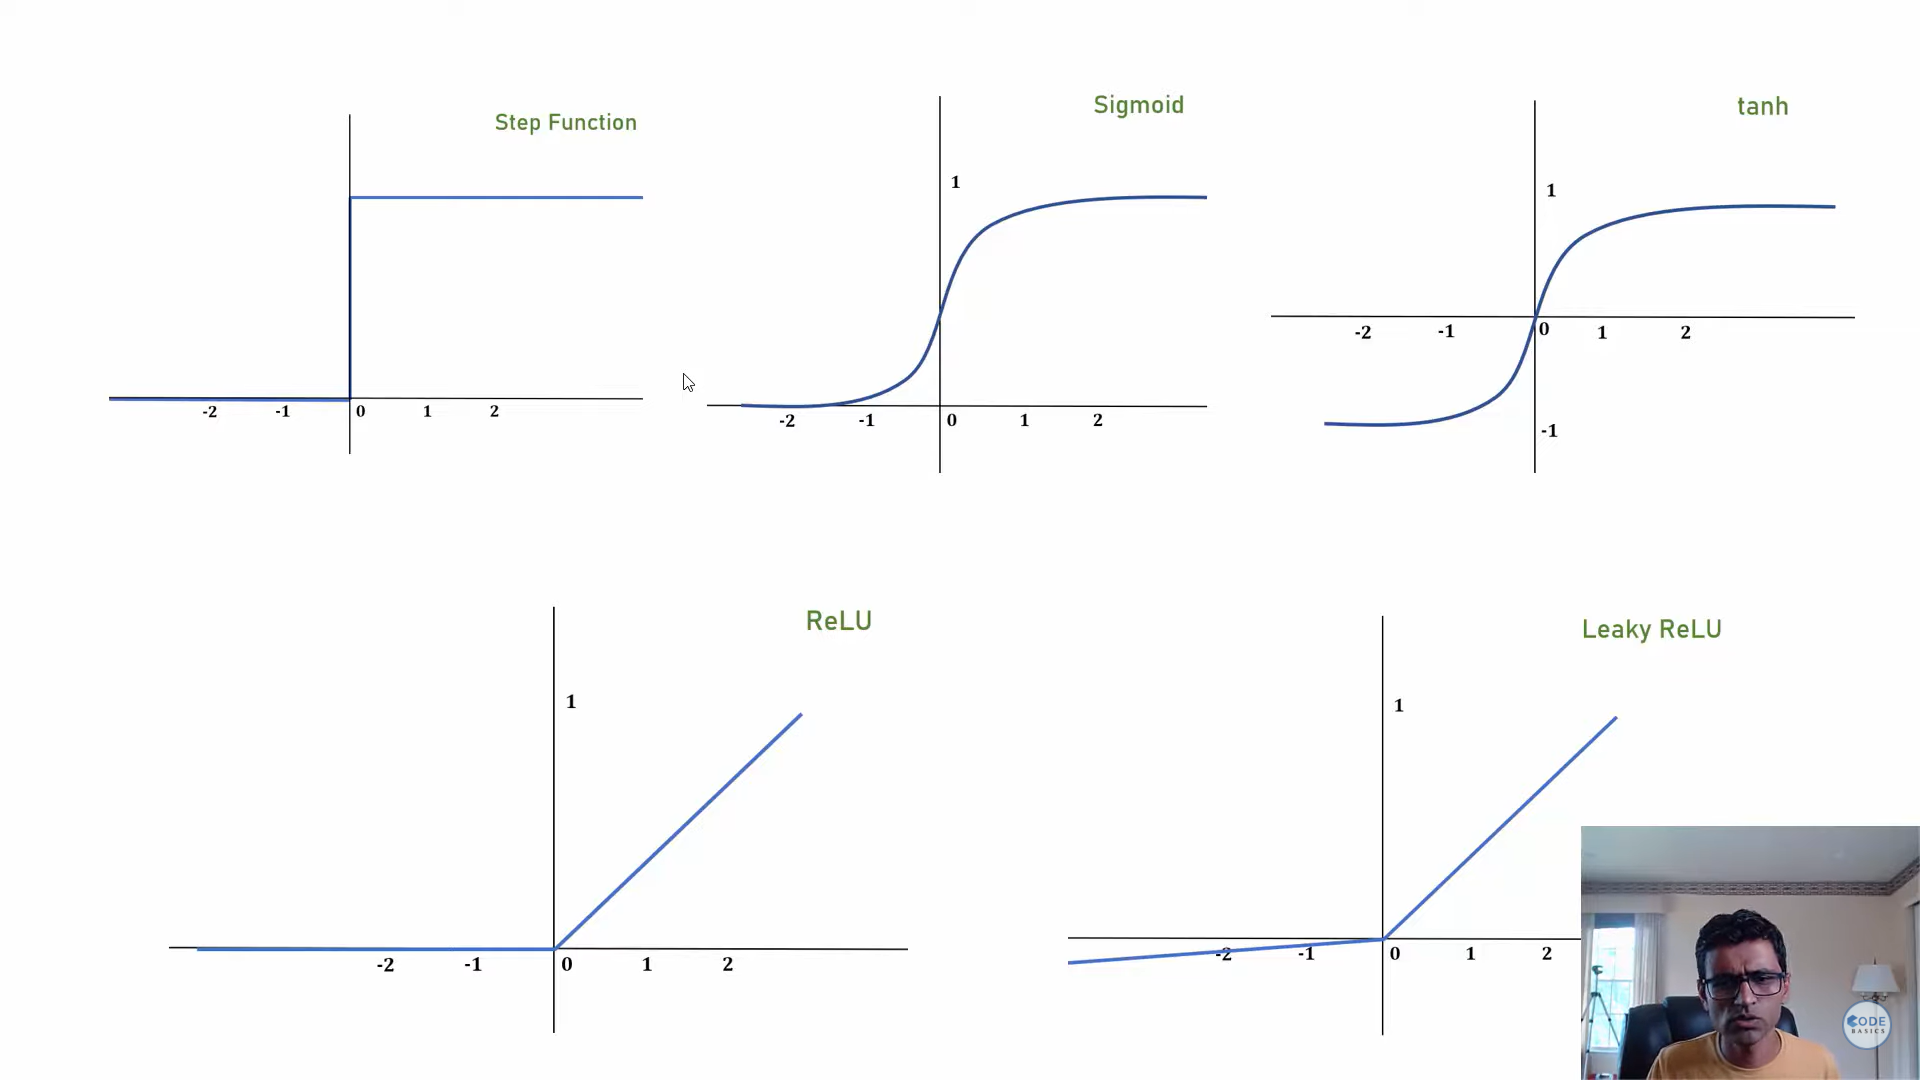

**Sigmoid**     

it converts values between 0 and 1

In [15]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [16]:
sigmoid(15)

0.999999694097773

In [17]:
sigmoid(45)

1.0

In [18]:
sigmoid(85)

1.0

In [19]:
sigmoid(12)

0.9999938558253978

In [22]:
sigmoid(-36)#value is almost equal to zero (e power -16)

2.319522830243569e-16

**tanh**

converts value between -1 and 1

In [23]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [24]:
tanh(45)

1.0

In [25]:
tanh(87)

1.0

In [26]:
tanh(23)

1.0

In [27]:
tanh(4)

0.9993292997390669

In [28]:
tanh(-65)

-1.0

In [29]:
tanh(-3)

-0.9950547536867306

**ReLu**  (rectified linear unit activation function)
 
 if the value is negative then it converts it to zero otherwise the same value
 
 **Note :** if you are not sure to which activation function for hidden layer then prefer **ReLu** as default function

In [30]:
def relu(x):
    return max(0,x)

In [31]:
relu(-45)

0

In [32]:
relu(69)

69

**Leaky ReLu**

if the value is negative then take the 0.1 th value of if(-56 --> -5.6) otherwise the same value

In [34]:
def leaky_relu(x):
    return max(0.1*x,x)

In [35]:
leaky_relu(-100)

-10.0

In [36]:
leaky_relu(25)

25

# Derivatives

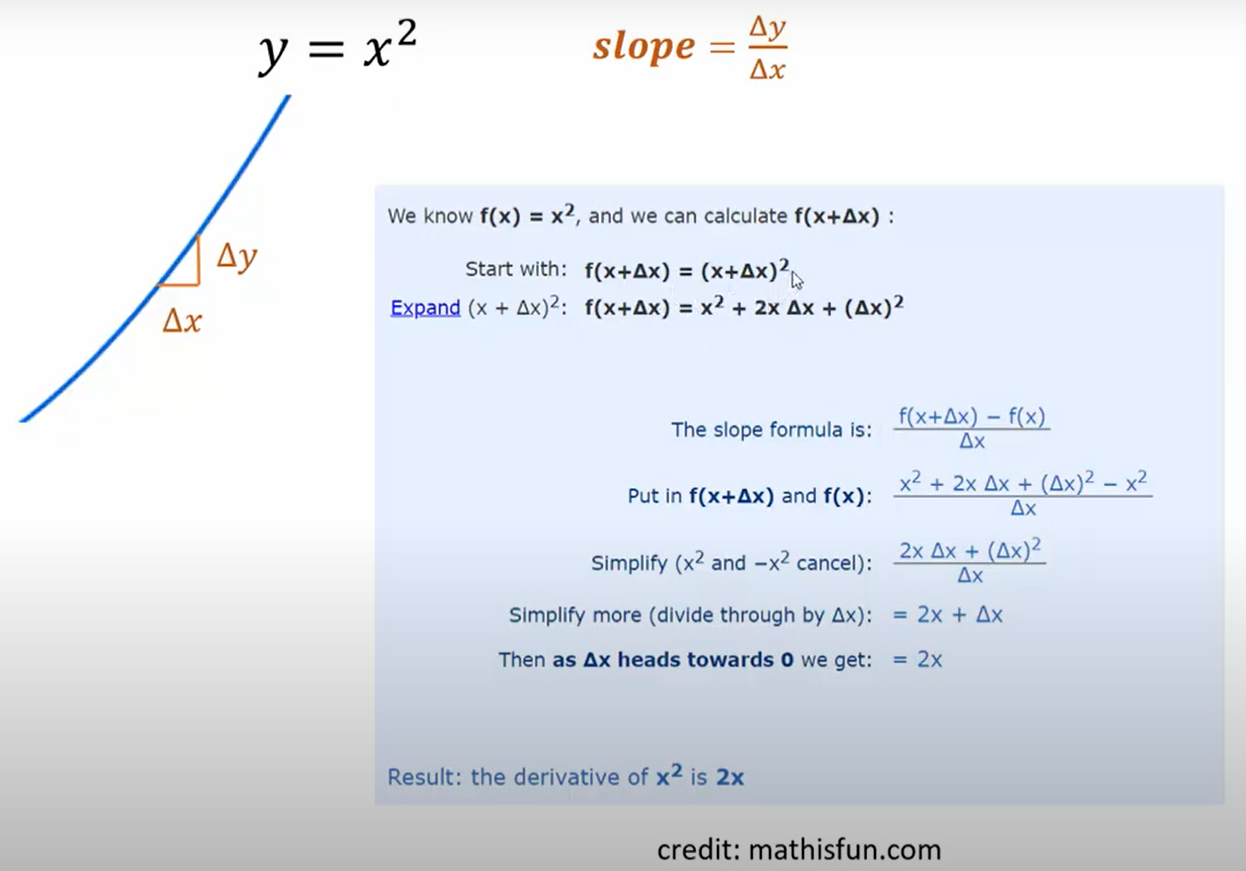

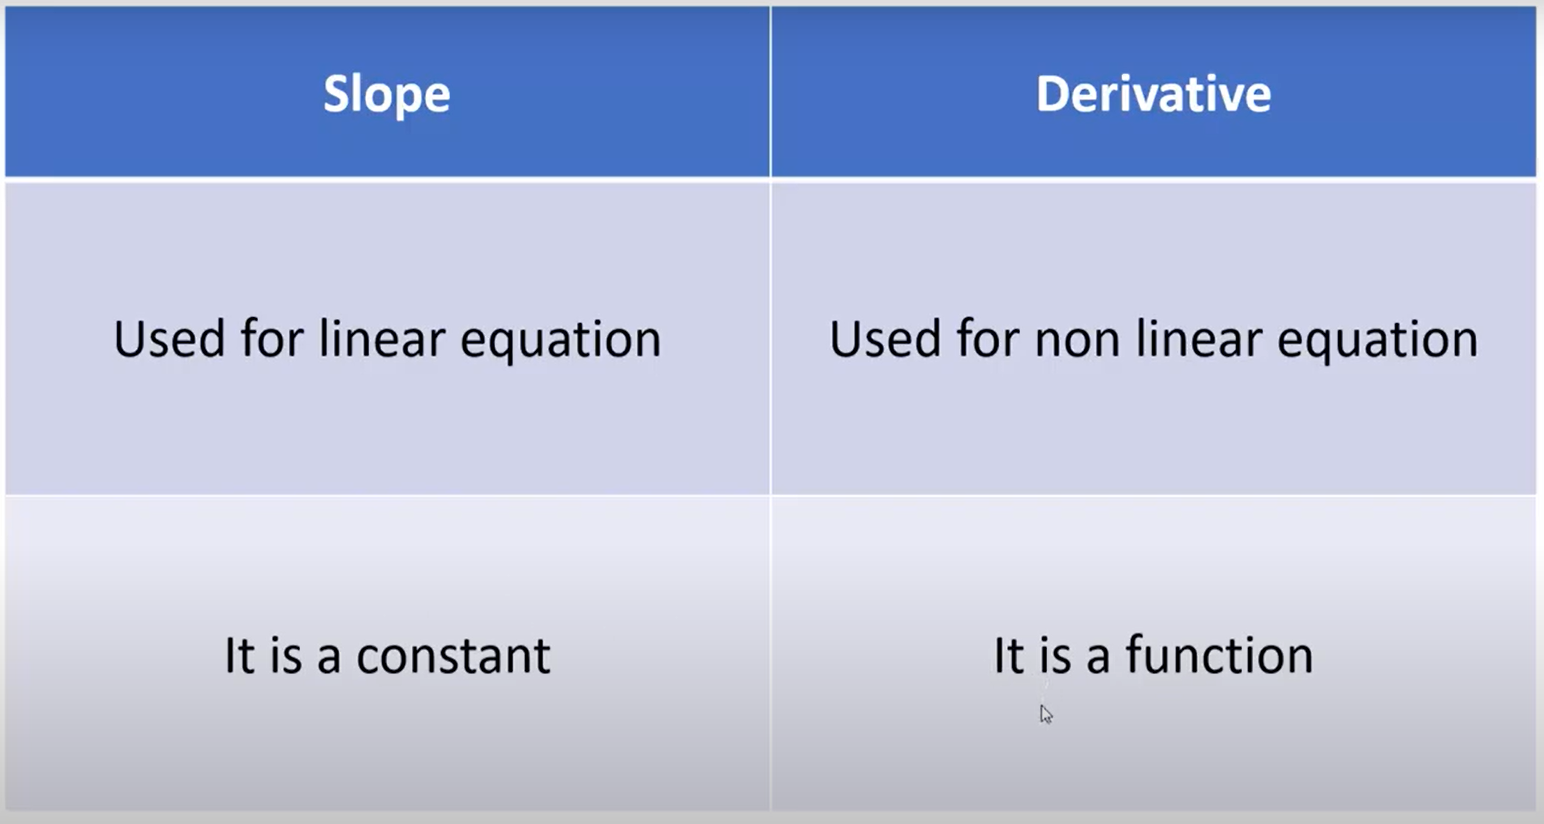

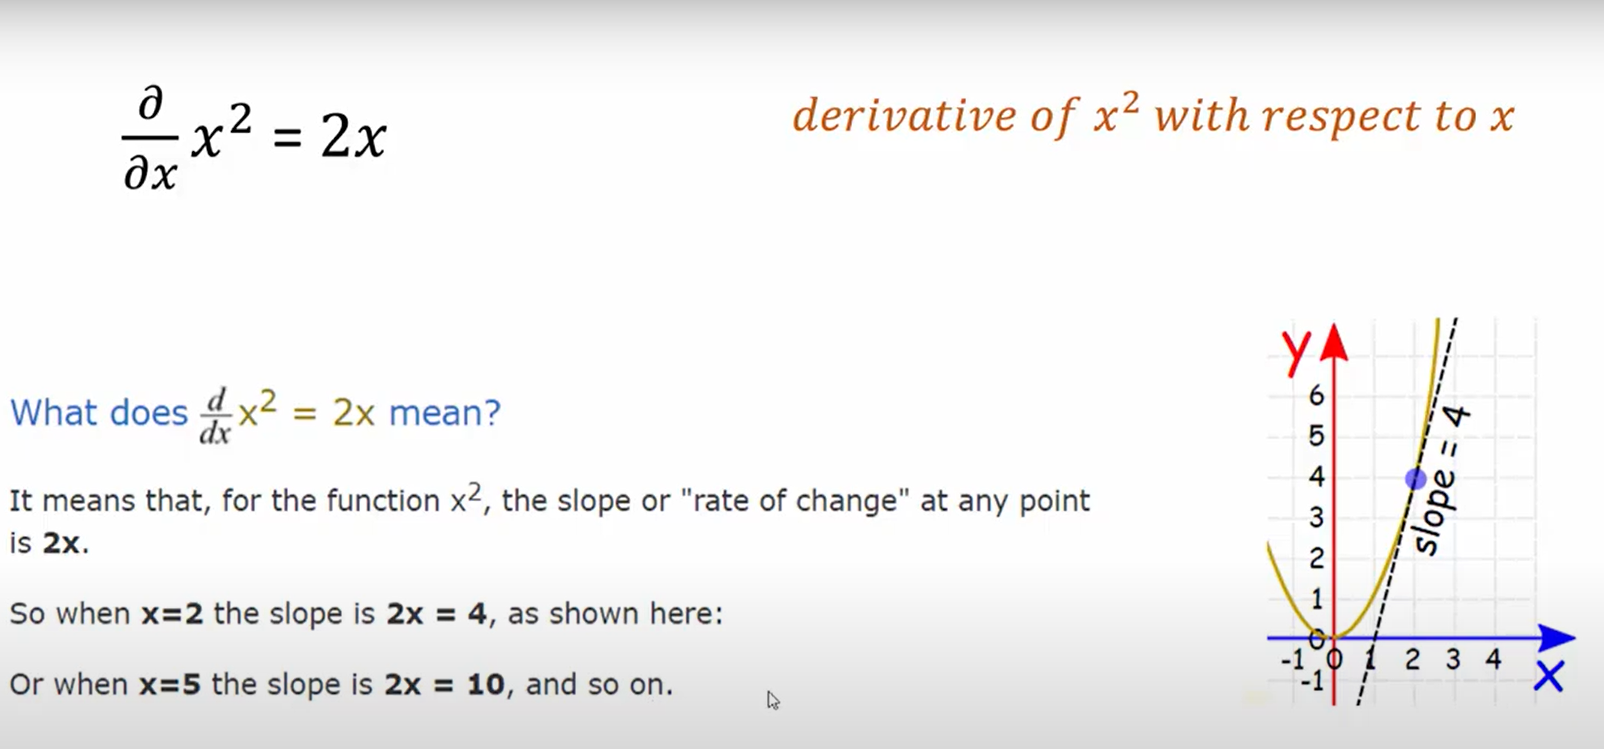

# Loss or cost function

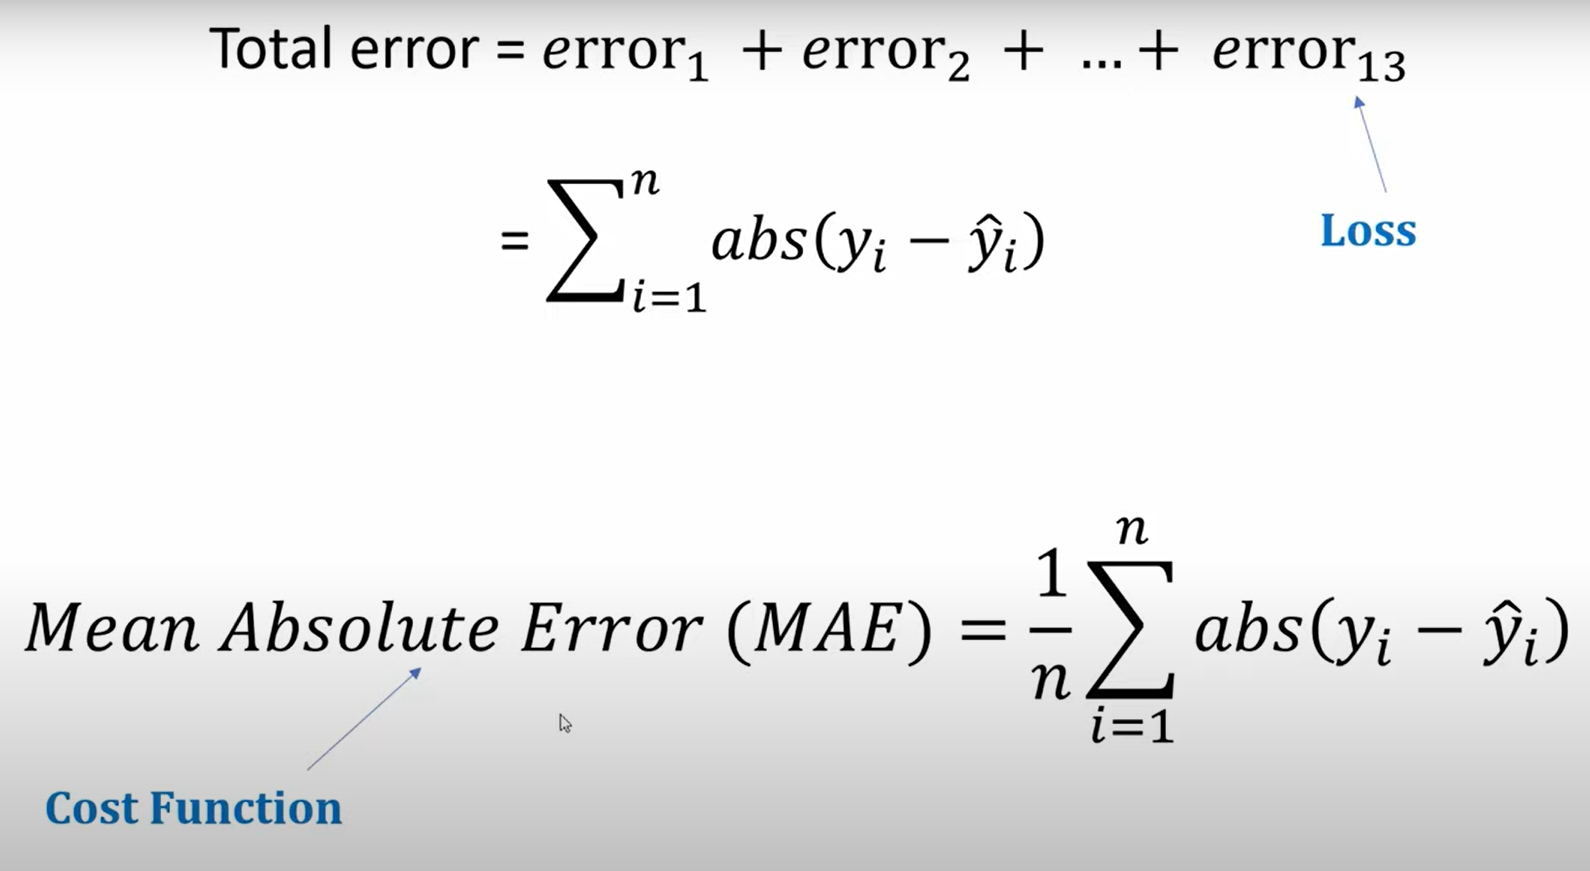

**Tensorflow loss value examples**    

sparse_categorical_crossentropy   
categorical_crossentropy  
binary_crossentropy  
mean_absolute_error   
mean_squared_error

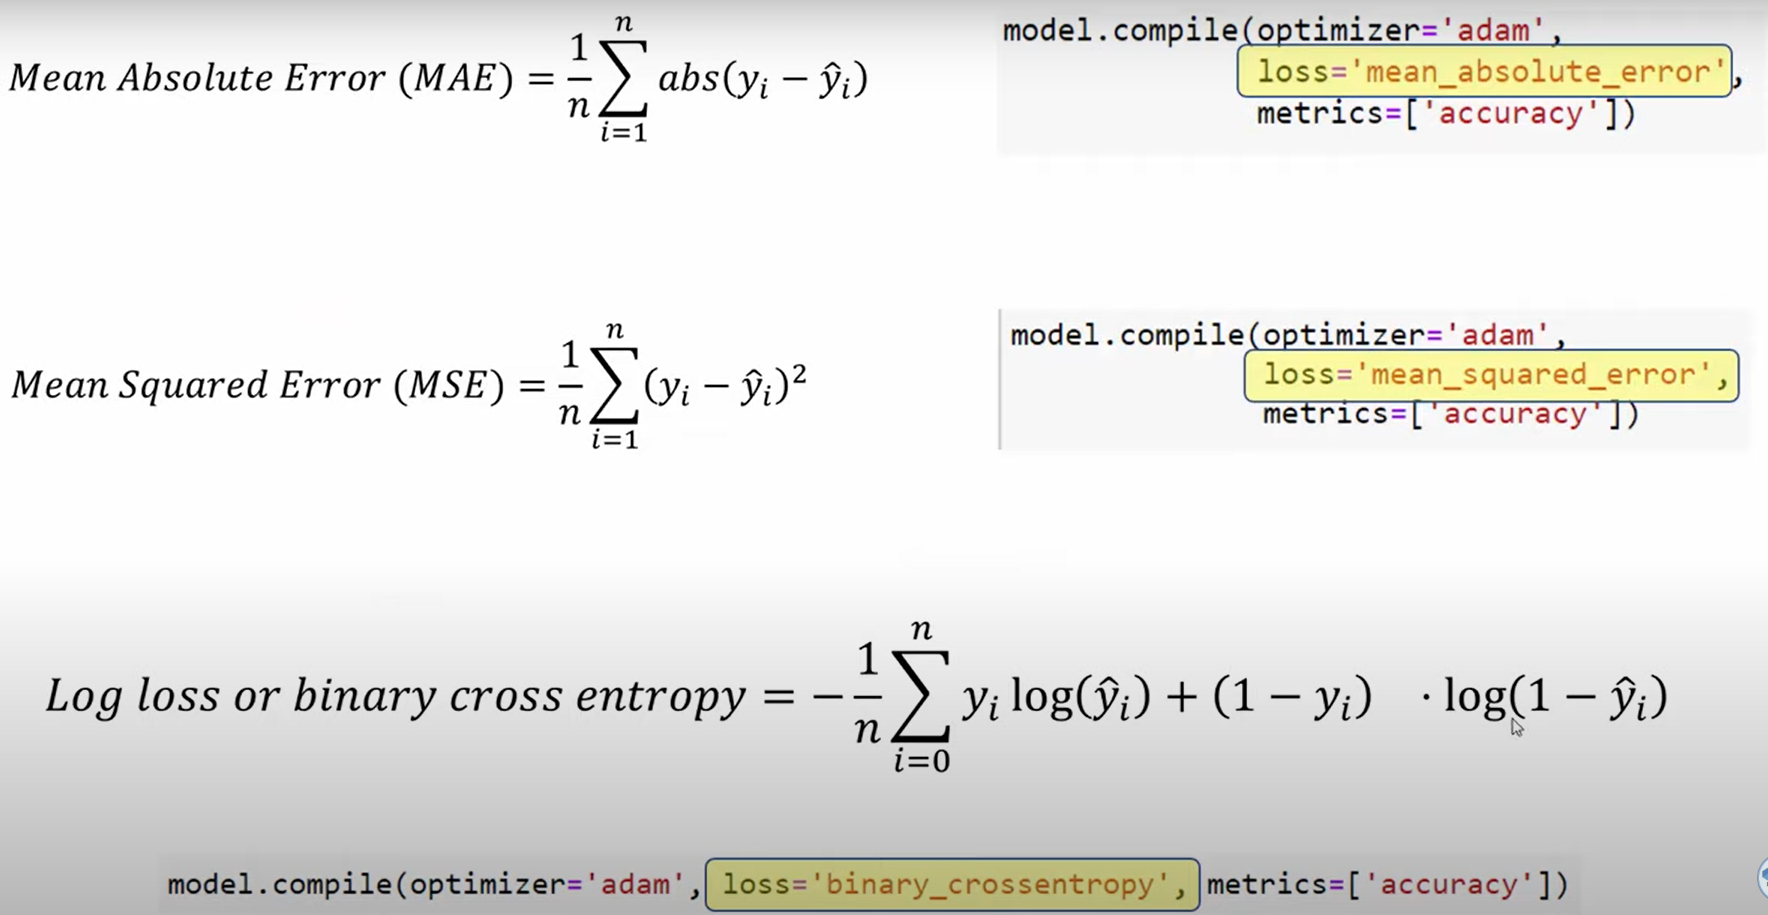

**Mean absolute Error**

In [1]:
import numpy as np 
#consider sample y_true and y_predicted values
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [47]:
def mean_absolute_error(y_true,y_predicted):
    total_error=0
    for true_value,predicted_value in zip(y_true,y_predicted):
        total_error+=abs(true_value-predicted_value)
    mae=total_error/len(y_true)
    return mae

In [48]:
mean_absolute_error(y_true,y_predicted)

0.5

In [50]:
#writing entire function within a single line using numpy
np.mean(np.abs(y_true-y_predicted))

0.5

**Mean squared error**

In [53]:
def mean_squared_error(y_true,y_predicted):
    total_error=0
    for true_value,predicted_value in zip(y_true,y_predicted):
        total_error+=np.square(true_value-predicted_value)
    mse=total_error/len(y_true)
    return mse

In [54]:
mean_squared_error(y_true,y_predicted)

0.366

In [56]:
#writing entire function within a single line using numpy
np.mean(np.square(y_true-y_predicted))

0.366

**Log loss (or) binary cross entropy**

**Note :** for logistic regression we use log loss but not MSE or MAE   
and the reason is  
https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c

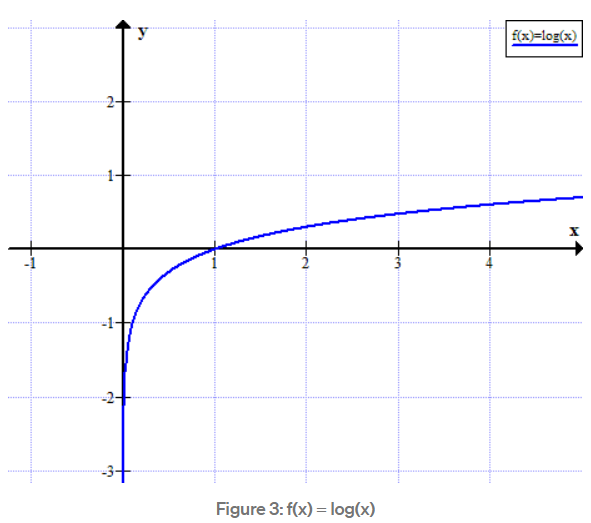

from the above figure , we can observe that    
log(0) = infinity and log(1)=0  
so we need replace 0 with value that is almost equal to 0(i.e 00000000000000001) and
1 with value that is almost equal to 1(i.e 0.9999999999999999)

In [4]:
y_predicted

array([1, 1, 0, 0, 1])

In [8]:
epsilone=0.000000000000001
y_predicted_new=[max(i,epsilone) if i==0 else min(i,1-epsilone) for i in y_predicted]

In [9]:
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [14]:
def log_loss(y_predicted,y_true):#using for loop 
    epsilone=0.000000000000001
    total_error=0
    y_predicted_new=[max(i,epsilone) if i==0 else min(i,1-epsilone) for i in y_predicted]
    for predicted_value,true_value in zip(y_predicted_new,y_true):
        total_error+= true_value*np.log(predicted_value)+(1-true_value)*np.log(1-predicted_value)
    logg_loss=total_error/len(y_true)
    return -logg_loss

In [15]:
log_loss(y_predicted,y_true)

17.2696280766844

In [21]:
def log_loss(y_true, y_predicted):#using numpy functions
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [22]:
log_loss(y_true, y_predicted)

17.2696280766844

# Gradient descent

Gradient descent is a technique to find weight and bias

consider, y=ax+b  
a--> weight  and  b--> bias  
weights are defined with w1,w2,.... and bias is defined with b

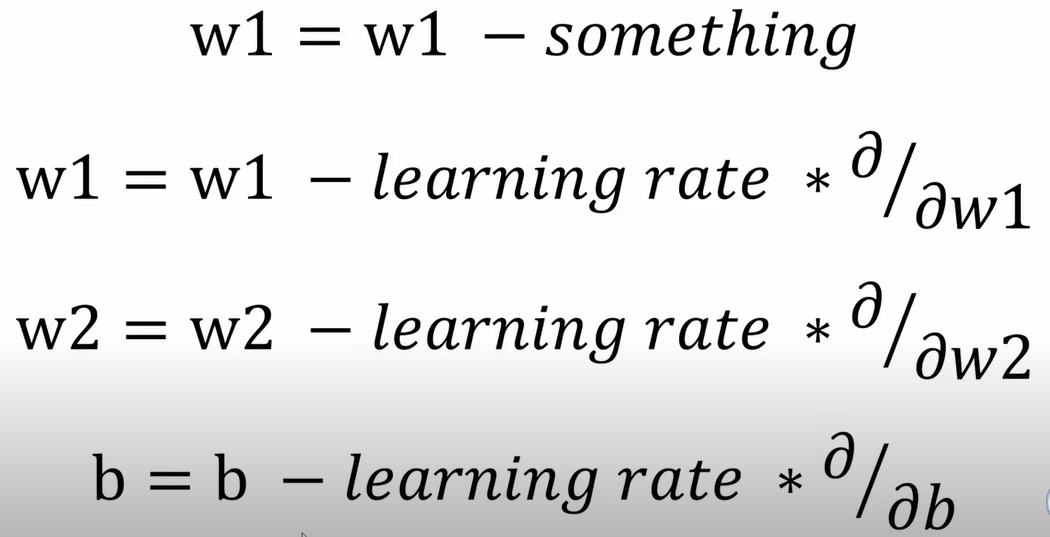

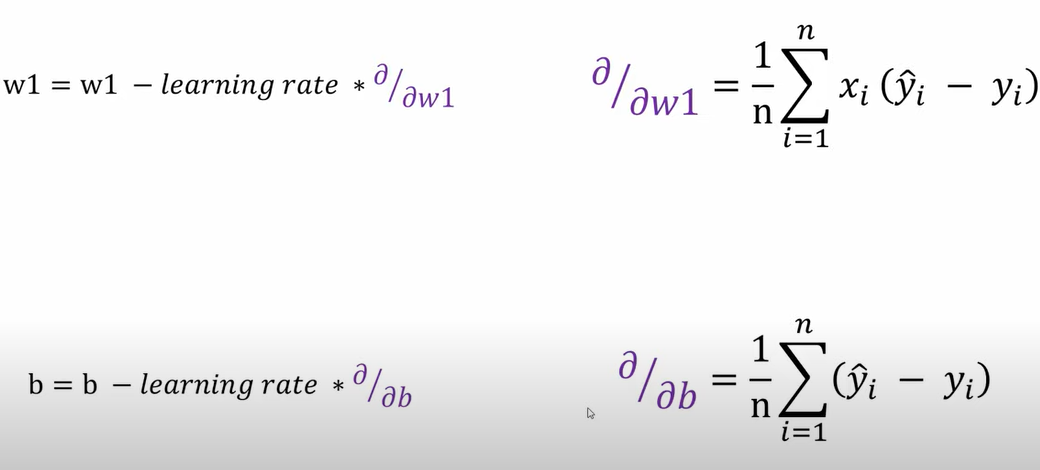

In [1]:
import pandas as pd

In [3]:
dataset=data
dataset.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [2]:
#importing sample insurance dataset
data=pd.read_csv(r"D:\programming languages\datasets\sample_insurance_dataset.csv")
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
#scaling the values of age by dividing them with 100
data['age']=data['age']/100
data.head()

,age,affordibility,bought_insurance
0,0.22,1,0
1,0.25,0,0
2,0.47,1,1
3,0.52,0,0
4,0.46,1,1


In [8]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['age','affordibility']],data['bought_insurance'],random_state=2,test_size=0.2)
x_train

,age,affordibility
16,0.25,0
6,0.55,0
3,0.52,0
21,0.26,0
26,0.23,1
25,0.54,1
12,0.27,0
4,0.46,1
10,0.18,1
5,0.56,1


In [9]:
x_test

,age,affordibility
1,0.25,0
0,0.22,1
14,0.49,1
9,0.61,1
19,0.18,1
17,0.58,1


**Training the neural network model with Keras**

In [10]:
from tensorflow import keras

In [11]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.7146 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7142 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.7138 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.7131 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.7127 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.7123 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7119 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7116 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.7112 - accuracy: 0.5000
Epoch 11/500

1/1 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.5000
Epoch 165/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6655 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6652 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6650 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6648 - accuracy: 0.5000
Epoch 169/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6646 - accuracy: 0.5000
Epoch 170/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.6644 - accuracy: 0.5000
Epoch 171/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.5000
Epoch 172/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6640 - accuracy: 0.5000
Epoch 173/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6638 - accuracy: 0.5455
Epoch 174/

1/1 [==============================] - 0s 13ms/step - loss: 0.6408 - accuracy: 0.6364
Epoch 327/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6407 - accuracy: 0.6364
Epoch 328/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.6406 - accuracy: 0.6364
Epoch 329/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6405 - accuracy: 0.6364
Epoch 330/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6404 - accuracy: 0.6364
Epoch 331/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6403 - accuracy: 0.6364
Epoch 332/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.6402 - accuracy: 0.6364
Epoch 333/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6401 - accuracy: 0.6364
Epoch 334/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6400 - accuracy: 0.6364
Epoch 335/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.6399 - accuracy: 0.6364
Epoch 

1/1 [==============================] - 0s 20ms/step - loss: 0.6290 - accuracy: 0.6364
Epoch 489/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6289 - accuracy: 0.6364
Epoch 490/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6289 - accuracy: 0.6364
Epoch 491/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6288 - accuracy: 0.6364
Epoch 492/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6288 - accuracy: 0.6364
Epoch 493/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6287 - accuracy: 0.6818
Epoch 494/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6287 - accuracy: 0.6818
Epoch 495/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6286 - accuracy: 0.6818
Epoch 496/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6286 - accuracy: 0.6818
Epoch 497/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6285 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 11ms/step - loss: 0.6214 - accuracy: 0.7273
Epoch 651/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7273
Epoch 652/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7273
Epoch 653/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6213 - accuracy: 0.7273
Epoch 654/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6213 - accuracy: 0.7273
Epoch 655/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 656/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 657/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 658/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 659/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 660

1/1 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.6818
Epoch 813/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6144 - accuracy: 0.6818
Epoch 814/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6144 - accuracy: 0.6818
Epoch 815/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6143 - accuracy: 0.6818
Epoch 816/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6143 - accuracy: 0.6818
Epoch 817/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6142 - accuracy: 0.6818
Epoch 818/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6142 - accuracy: 0.6818
Epoch 819/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6142 - accuracy: 0.6818
Epoch 820/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6141 - accuracy: 0.6818
Epoch 821/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6141 - accuracy: 0.6818
Epoch 82

1/1 [==============================] - 0s 20ms/step - loss: 0.6074 - accuracy: 0.6818
Epoch 975/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6073 - accuracy: 0.6818
Epoch 976/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6073 - accuracy: 0.6818
Epoch 977/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6072 - accuracy: 0.6818
Epoch 978/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6072 - accuracy: 0.6818
Epoch 979/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6071 - accuracy: 0.6818
Epoch 980/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6071 - accuracy: 0.6818
Epoch 981/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.6070 - accuracy: 0.6818
Epoch 982/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6070 - accuracy: 0.6818
Epoch 983/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6070 - accuracy: 0.6818
Epoch 

Epoch 1055/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6037 - accuracy: 0.6818
Epoch 1056/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.6818
Epoch 1057/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.6818
Epoch 1058/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6036 - accuracy: 0.6818
Epoch 1059/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6036 - accuracy: 0.6818
Epoch 1060/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.6818
Epoch 1061/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6035 - accuracy: 0.6818
Epoch 1062/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6034 - accuracy: 0.6818
Epoch 1063/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6034 - accuracy: 0.6818
Epoch 1064/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6033 - ac

1/1 [==============================] - 0s 13ms/step - loss: 0.5966 - accuracy: 0.6818
Epoch 1216/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5965 - accuracy: 0.6818
Epoch 1217/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5965 - accuracy: 0.6818
Epoch 1218/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5964 - accuracy: 0.6818
Epoch 1219/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5964 - accuracy: 0.6818
Epoch 1220/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5964 - accuracy: 0.6818
Epoch 1221/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5963 - accuracy: 0.6818
Epoch 1222/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5963 - accuracy: 0.6818
Epoch 1223/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5962 - accuracy: 0.6818
Epoch 1224/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5962 - accuracy: 0.68

1/1 [==============================] - 0s 8ms/step - loss: 0.5894 - accuracy: 0.6818
Epoch 1376/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5894 - accuracy: 0.6818
Epoch 1377/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5893 - accuracy: 0.6818
Epoch 1378/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5893 - accuracy: 0.6818
Epoch 1379/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5893 - accuracy: 0.6818
Epoch 1380/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5892 - accuracy: 0.6818
Epoch 1381/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.6818
Epoch 1382/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5891 - accuracy: 0.6818
Epoch 1383/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5891 - accuracy: 0.6818
Epoch 1384/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5890 - accuracy: 0.6818


1/1 [==============================] - 0s 8ms/step - loss: 0.5824 - accuracy: 0.6818
Epoch 1536/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5823 - accuracy: 0.6818
Epoch 1537/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5823 - accuracy: 0.6818
Epoch 1538/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.6818
Epoch 1539/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.6818
Epoch 1540/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5822 - accuracy: 0.6818
Epoch 1541/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5821 - accuracy: 0.6818
Epoch 1542/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5821 - accuracy: 0.6818
Epoch 1543/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5820 - accuracy: 0.6818
Epoch 1544/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5820 - accuracy: 0.6818
E

1/1 [==============================] - 0s 11ms/step - loss: 0.5755 - accuracy: 0.6818
Epoch 1696/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5754 - accuracy: 0.6818
Epoch 1697/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5754 - accuracy: 0.6818
Epoch 1698/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5753 - accuracy: 0.6818
Epoch 1699/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5753 - accuracy: 0.6818
Epoch 1700/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5752 - accuracy: 0.6818
Epoch 1701/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5752 - accuracy: 0.6818
Epoch 1702/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5752 - accuracy: 0.6818
Epoch 1703/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5751 - accuracy: 0.6818
Epoch 1704/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5751 - accuracy: 0.68

1/1 [==============================] - 0s 13ms/step - loss: 0.5687 - accuracy: 0.6818
Epoch 1856/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5687 - accuracy: 0.6818
Epoch 1857/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5686 - accuracy: 0.6818
Epoch 1858/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5686 - accuracy: 0.6818
Epoch 1859/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5685 - accuracy: 0.6818
Epoch 1860/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5685 - accuracy: 0.6818
Epoch 1861/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.6818
Epoch 1862/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5684 - accuracy: 0.6818
Epoch 1863/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5684 - accuracy: 0.6818
Epoch 1864/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5683 - accuracy: 0.6818


1/1 [==============================] - 0s 13ms/step - loss: 0.5622 - accuracy: 0.6818
Epoch 2016/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5621 - accuracy: 0.6818
Epoch 2017/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5621 - accuracy: 0.6818
Epoch 2018/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 2019/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 2020/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 2021/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 2022/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 2023/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5618 - accuracy: 0.6818
Epoch 2024/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5618 - accuracy: 0.6818

1/1 [==============================] - 0s 11ms/step - loss: 0.5558 - accuracy: 0.6818
Epoch 2176/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5558 - accuracy: 0.6818
Epoch 2177/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5557 - accuracy: 0.6818
Epoch 2178/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5557 - accuracy: 0.6818
Epoch 2179/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5557 - accuracy: 0.6818
Epoch 2180/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5556 - accuracy: 0.6818
Epoch 2181/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5556 - accuracy: 0.6818
Epoch 2182/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5555 - accuracy: 0.6818
Epoch 2183/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5555 - accuracy: 0.6818
Epoch 2184/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5555 - accuracy: 0.6818

1/1 [==============================] - 0s 15ms/step - loss: 0.5497 - accuracy: 0.6818
Epoch 2336/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5497 - accuracy: 0.6818
Epoch 2337/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5496 - accuracy: 0.6818
Epoch 2338/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5496 - accuracy: 0.6818
Epoch 2339/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5495 - accuracy: 0.6818
Epoch 2340/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5495 - accuracy: 0.6818
Epoch 2341/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5495 - accuracy: 0.6818
Epoch 2342/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5494 - accuracy: 0.6818
Epoch 2343/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5494 - accuracy: 0.6818
Epoch 2344/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5494 - accuracy: 0.68

1/1 [==============================] - 0s 11ms/step - loss: 0.5438 - accuracy: 0.7273
Epoch 2496/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5438 - accuracy: 0.7273
Epoch 2497/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5437 - accuracy: 0.7273
Epoch 2498/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5437 - accuracy: 0.7273
Epoch 2499/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5437 - accuracy: 0.7273
Epoch 2500/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2501/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5435 - accuracy: 0.7273


1/1 [==============================] - 0s 8ms/step - loss: 0.5382 - accuracy: 0.7273
Epoch 2656/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5381 - accuracy: 0.7273
Epoch 2657/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5381 - accuracy: 0.7273
Epoch 2658/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5381 - accuracy: 0.7273
Epoch 2659/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5380 - accuracy: 0.7273
Epoch 2660/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5380 - accuracy: 0.7273
Epoch 2661/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2662/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2663/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2664/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5378 - accuracy: 0.727

1/1 [==============================] - 0s 9ms/step - loss: 0.5327 - accuracy: 0.7273
Epoch 2816/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5327 - accuracy: 0.7273
Epoch 2817/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5327 - accuracy: 0.7273
Epoch 2818/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5326 - accuracy: 0.7273
Epoch 2819/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5326 - accuracy: 0.7273
Epoch 2820/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5326 - accuracy: 0.7273
Epoch 2821/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5325 - accuracy: 0.7273
Epoch 2822/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5325 - accuracy: 0.7273
Epoch 2823/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5325 - accuracy: 0.7273
Epoch 2824/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5324 - accuracy: 0.7273


1/1 [==============================] - 0s 10ms/step - loss: 0.5275 - accuracy: 0.7727
Epoch 2976/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5275 - accuracy: 0.7727
Epoch 2977/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5275 - accuracy: 0.7727
Epoch 2978/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5274 - accuracy: 0.7727
Epoch 2979/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5274 - accuracy: 0.7727
Epoch 2980/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5274 - accuracy: 0.7727
Epoch 2981/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5273 - accuracy: 0.7727
Epoch 2982/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5273 - accuracy: 0.7727
Epoch 2983/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5273 - accuracy: 0.7727
Epoch 2984/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5272 - accuracy: 0.7

1/1 [==============================] - 0s 9ms/step - loss: 0.5225 - accuracy: 0.7727
Epoch 3136/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5225 - accuracy: 0.7727
Epoch 3137/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5225 - accuracy: 0.7727
Epoch 3138/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 3139/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 3140/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 3141/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 3142/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5223 - accuracy: 0.7727
Epoch 3143/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5223 - accuracy: 0.7727
Epoch 3144/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5223 - accuracy: 0.7727

1/1 [==============================] - 0s 8ms/step - loss: 0.5178 - accuracy: 0.8182
Epoch 3296/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5177 - accuracy: 0.8182
Epoch 3297/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5177 - accuracy: 0.8182
Epoch 3298/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5177 - accuracy: 0.8182
Epoch 3299/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5176 - accuracy: 0.8182
Epoch 3300/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5176 - accuracy: 0.8182
Epoch 3301/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5176 - accuracy: 0.8182
Epoch 3302/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5176 - accuracy: 0.8182
Epoch 3303/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5175 - accuracy: 0.8182
Epoch 3304/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5175 - accuracy: 0.8182


1/1 [==============================] - 0s 8ms/step - loss: 0.5132 - accuracy: 0.8182
Epoch 3456/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5132 - accuracy: 0.8182
Epoch 3457/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5131 - accuracy: 0.8182
Epoch 3458/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5131 - accuracy: 0.8182
Epoch 3459/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5131 - accuracy: 0.8182
Epoch 3460/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5131 - accuracy: 0.8182
Epoch 3461/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5130 - accuracy: 0.8182
Epoch 3462/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5130 - accuracy: 0.8182
Epoch 3463/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5130 - accuracy: 0.8182
Epoch 3464/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5129 - accuracy: 0.81

1/1 [==============================] - 0s 11ms/step - loss: 0.5088 - accuracy: 0.8182
Epoch 3616/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5088 - accuracy: 0.8182
Epoch 3617/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5088 - accuracy: 0.8182
Epoch 3618/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5087 - accuracy: 0.8182
Epoch 3619/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5087 - accuracy: 0.8182
Epoch 3620/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5087 - accuracy: 0.8182
Epoch 3621/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5087 - accuracy: 0.8182
Epoch 3622/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5086 - accuracy: 0.8182
Epoch 3623/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5086 - accuracy: 0.8182
Epoch 3624/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5086 - accuracy: 0.8182

1/1 [==============================] - 0s 17ms/step - loss: 0.5046 - accuracy: 0.8182
Epoch 3776/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.5046 - accuracy: 0.8182
Epoch 3777/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5046 - accuracy: 0.8182
Epoch 3778/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5046 - accuracy: 0.8182
Epoch 3779/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5045 - accuracy: 0.8182
Epoch 3780/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5045 - accuracy: 0.8182
Epoch 3781/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5045 - accuracy: 0.8182
Epoch 3782/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5045 - accuracy: 0.8182
Epoch 3783/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5044 - accuracy: 0.8182
Epoch 3784/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5044 - accuracy: 0.8182

1/1 [==============================] - 0s 7ms/step - loss: 0.5006 - accuracy: 0.8182
Epoch 3936/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5006 - accuracy: 0.8182
Epoch 3937/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5006 - accuracy: 0.8182
Epoch 3938/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5006 - accuracy: 0.8182
Epoch 3939/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5005 - accuracy: 0.8182
Epoch 3940/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5005 - accuracy: 0.8182
Epoch 3941/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5005 - accuracy: 0.8182
Epoch 3942/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5005 - accuracy: 0.8182
Epoch 3943/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5004 - accuracy: 0.8182
Epoch 3944/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5004 - accuracy: 0.818

1/1 [==============================] - 0s 14ms/step - loss: 0.4968 - accuracy: 0.8636
Epoch 4096/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4968 - accuracy: 0.8636
Epoch 4097/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4968 - accuracy: 0.8636
Epoch 4098/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4967 - accuracy: 0.8636
Epoch 4099/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4967 - accuracy: 0.8636
Epoch 4100/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4967 - accuracy: 0.8636
Epoch 4101/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4967 - accuracy: 0.8636
Epoch 4102/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4966 - accuracy: 0.8636
Epoch 4103/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4966 - accuracy: 0.8636
Epoch 4104/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4966 - accuracy: 0.863

1/1 [==============================] - 0s 8ms/step - loss: 0.4931 - accuracy: 0.8636
Epoch 4256/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4931 - accuracy: 0.8636
Epoch 4257/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4931 - accuracy: 0.8636
Epoch 4258/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4931 - accuracy: 0.8636
Epoch 4259/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4931 - accuracy: 0.8636
Epoch 4260/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4930 - accuracy: 0.8636
Epoch 4261/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4930 - accuracy: 0.8636
Epoch 4262/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4930 - accuracy: 0.8636
Epoch 4263/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4930 - accuracy: 0.8636
Epoch 4264/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4929 - accuracy: 0.8636


1/1 [==============================] - 0s 15ms/step - loss: 0.4896 - accuracy: 0.8636
Epoch 4416/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.4896 - accuracy: 0.8636
Epoch 4417/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.4896 - accuracy: 0.8636
Epoch 4418/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4896 - accuracy: 0.8636
Epoch 4419/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4896 - accuracy: 0.8636
Epoch 4420/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4895 - accuracy: 0.8636
Epoch 4421/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4895 - accuracy: 0.8636
Epoch 4422/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4895 - accuracy: 0.8636
Epoch 4423/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4895 - accuracy: 0.8636
Epoch 4424/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4895 - accuracy: 0.863

1/1 [==============================] - 0s 12ms/step - loss: 0.4863 - accuracy: 0.9091
Epoch 4576/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4863 - accuracy: 0.9091
Epoch 4577/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4863 - accuracy: 0.9091
Epoch 4578/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4862 - accuracy: 0.9091
Epoch 4579/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4862 - accuracy: 0.9091
Epoch 4580/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.4862 - accuracy: 0.9091
Epoch 4581/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.9091
Epoch 4582/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4862 - accuracy: 0.9091
Epoch 4583/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4861 - accuracy: 0.9091
Epoch 4584/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4861 - accuracy: 0.9091

1/1 [==============================] - 0s 10ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4736/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4737/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4738/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4739/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4740/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4741/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4742/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4743/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4829 - accuracy: 0.9091
Epoch 4744/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.4829 - accuracy: 0.90

1/1 [==============================] - 0s 11ms/step - loss: 0.4800 - accuracy: 0.9091
Epoch 4896/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4800 - accuracy: 0.9091
Epoch 4897/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4800 - accuracy: 0.9091
Epoch 4898/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.9091
Epoch 4899/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4799 - accuracy: 0.9091
Epoch 4900/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4799 - accuracy: 0.9091
Epoch 4901/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4799 - accuracy: 0.9091
Epoch 4902/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4799 - accuracy: 0.9091
Epoch 4903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.9091
Epoch 4904/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4799 - accuracy: 0.9091


In [12]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.3153 - accuracy: 1.0000


[0.31525877118110657, 1.0]

In [13]:
y_test

1     0
0     0
14    1
9     1
19    0
17    1
Name: bought_insurance, dtype: int64

In [22]:
y_predicted=model.predict(x_test)
y_predicted

1/1 [==============================] - 0s 55ms/step


array([[0.16282055],
       [0.41183794],
       [0.7255057 ],
       [0.826683  ],
       [0.3651317 ],
       [0.8045075 ]], dtype=float32)

In [30]:
y_pred=[np.round(i) for i in y_predicted]
y_pred

[array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32)]

In [38]:
#getting the values of weights and bias
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[4.9196706],
        [1.4286072]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.8673074], dtype=float32)>]

In [39]:
w1=4.9196706
w2=1.4286072
b=-2.8673074

**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [41]:
#writing sigmoid function
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

0.9933071490757153

In [42]:
#function for prediction
def predict_function(age,affordibility):
    weighted_sum=w1*age+w2*affordibility+b
    return sigmoid(weighted_sum)

In [52]:
#predicting the output for age = 56 and affordibility = 1
predict_function(.56,1)

0.7885680212424273

**Writing Gradient descent function**

In [71]:
#sigmoid function for numpy array
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [80]:
#log loss function
def log_loss(y_true,y_predicted):
    e=1e-15
    y_predicted_new=[max(0,e) if i==0 else min(i,1-e) for i in y_predicted]
    y_predicted_new=np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [120]:
#gradient descent function
def gradient_descent(age,affordability,y_true,epochs,loss_thresold):
    w1=1
    w2=1
    b=0
    learning_rate=0.1
    n=len(age)
    for i in range(epochs):
        weighted_sum=w1*age+w2*affordability+b
        y_predicted=sigmoid_numpy(weighted_sum)
        loss=log_loss(y_true,y_predicted)
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
        bd=np.mean(y_predicted-y_true)
        w1=w1-learning_rate*w1d
        w2=w2-learning_rate*w2d
        b=b-learning_rate*bd
        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{b}, loss:{loss}')
        if loss<=loss_thresold:
            break
    return w1,w2,b

In [121]:
w1,w2,bias=gradient_descent(x_train['age'],x_train['affordibility'],y_train,5000,0.4781)

Epoch:0, w1:0.9946783829750357, w2:0.9896958110104938, bias:-0.02266873040895484, loss:0.714610156590683
Epoch:1, w1:0.9895824263511518, w2:0.9797458113005014, bias:-0.04476763958872976, loss:0.7082150822853268
Epoch:2, w1:0.9847092184655419, w2:0.9701469478592935, bias:-0.0663046189315582, loss:0.7021667673574312
Epoch:3, w1:0.9800556178244235, w2:0.9608956742177415, bias:-0.08728809739228191, loss:0.696450926489868
Epoch:4, w1:0.9756182721107732, w2:0.9519879821397449, bias:-0.10772699353869716, loss:0.6910533214790615
Epoch:5, w1:0.9713936374458485, w2:0.9434194346226642, bias:-0.12763066728565228, loss:0.6859598231194918
Epoch:6, w1:0.9673779977104789, w2:0.9351851997837518, bias:-0.14700887177176036, loss:0.6811564678877242
Epoch:7, w1:0.96356748374708, w2:0.9272800852336305, bias:-0.16587170579839758, loss:0.6766295092056545
Epoch:8, w1:0.9599580922800861, w2:0.9196985725670581, bias:-0.18422956720774245, loss:0.6723654631699337
Epoch:9, w1:0.9565457044104485, w2:0.91243485163420

Epoch:88, w1:1.0074869180991952, w2:0.8550219672228815, bias:-0.8086665264109596, loss:0.5994363962118129
Epoch:89, w1:1.009791932995588, w2:0.8567767224518158, bias:-0.8120894315675056, loss:0.5992342800920292
Epoch:90, w1:1.0121084595522596, w2:0.858542041220368, bias:-0.8154796396531143, loss:0.5990335289688257
Epoch:91, w1:1.0144360692525265, w2:0.8603172040176494, bias:-0.8188382020269726, loss:0.5988340885991618
Epoch:92, w1:1.016774349913575, w2:0.8621015203043693, bias:-0.8221661301870654, loss:0.5986359085170153
Epoch:93, w1:1.0191229050661275, w2:0.8638943274152617, bias:-0.8254643972877259, loss:0.5984389417497783
Epoch:94, w1:1.0214813533567415, w2:0.8656949895008474, bias:-0.8287339396014421, loss:0.5982431445559994
Epoch:95, w1:1.0238493279720067, w2:0.867502896507304, bias:-0.8319756579267735, loss:0.5980484761828836
Epoch:96, w1:1.0262264760839124, w2:0.8693174631932438, bias:-0.8351904189441809, loss:0.5978548986420719
Epoch:97, w1:1.0286124583156835, w2:0.871138128182

Epoch:177, w1:1.2323816677926391, w2:1.0121745494113012, bias:-1.0477460031299886, loss:0.5844160270168757
Epoch:178, w1:1.2349928185705956, w2:1.0137498768848268, bias:-1.050035092605807, loss:0.5842703347606566
Epoch:179, w1:1.2376044504809165, w2:1.0153196028626383, bias:-1.0523189263315338, loss:0.5841250358052701
Epoch:180, w1:1.2402165466403383, w2:1.0168837306979057, bias:-1.0545975510086436, loss:0.5839801275974753
Epoch:181, w1:1.242829090665054, w2:1.0184422644958129, bias:-1.0568710121017364, loss:0.5838356076072387
Epoch:182, w1:1.2454420666519976, w2:1.019995209080424, bias:-1.0591393538841392, loss:0.5836914733273206
Epoch:183, w1:1.2480554591608566, w2:1.0215425699628615, bias:-1.0614026194817396, loss:0.5835477222728831
Epoch:184, w1:1.2506692531967838, w2:1.0230843533107397, bias:-1.063660850915121, loss:0.5834043519811144
Epoch:185, w1:1.25328343419378, w2:1.024620565918809, bias:-1.0659140891400638, loss:0.5832613600108743
Epoch:186, w1:1.255897987998721, w2:1.026151

Epoch:257, w1:1.4418995934634675, w2:1.121443078467253, bias:-1.2168709820402652, loss:0.5738238779860114
Epoch:258, w1:1.4445188375775841, w2:1.1226109987713397, bias:-1.2188296815883088, loss:0.5737030855795102
Epoch:259, w1:1.4471379528130437, w2:1.1237744998964871, bias:-1.2207849974086882, loss:0.5735825364014114
Epoch:260, w1:1.449756935498052, w2:1.1249335989487612, bias:-1.22273694257609, loss:0.5734622291094844
Epoch:261, w1:1.4523757819955536, w2:1.1260883129925525, bias:-1.2246855300654298, loss:0.5733421623717262
Epoch:262, w1:1.45499448870238, w2:1.1272386590495214, bias:-1.2266307727540016, loss:0.5732223348662772
Epoch:263, w1:1.4576130520484292, w2:1.128384654097597, bias:-1.2285726834235495, loss:0.5731027452813366
Epoch:264, w1:1.4602314684958733, w2:1.1295263150700272, bias:-1.2305112747622704, loss:0.5729833923150807
Epoch:265, w1:1.462849734538396, w2:1.1306636588544774, bias:-1.2324465593667457, loss:0.5728642746755777
Epoch:266, w1:1.4654678467004563, w2:1.131796

Epoch:342, w1:1.6637642153899768, w2:1.2065261796828974, bias:-1.3724177854095485, loss:0.5643105015320722
Epoch:343, w1:1.6663617555072705, w2:1.2073743965641377, bias:-1.3741284430544725, loss:0.564206452137349
Epoch:344, w1:1.6689589316794375, w2:1.2082194582216468, bias:-1.375836593341293, loss:0.564102561333121
Epoch:345, w1:1.6715557417577287, w2:1.2090613771610774, bias:-1.3775422445840901, loss:0.5639988284054606
Epoch:346, w1:1.6741521836038644, w2:1.2099001658365236, bias:-1.379245405061592, loss:0.5638952526455522
Epoch:347, w1:1.676748255089964, w2:1.210735836650713, bias:-1.3809460830173992, loss:0.5637918333496545
Epoch:348, w1:1.6793439540984758, w2:1.2115684019552018, bias:-1.3826442866602031, loss:0.5636885698190585
Epoch:349, w1:1.681939278522109, w2:1.2123978740505679, bias:-1.3843400241640034, loss:0.5635854613600461
Epoch:350, w1:1.6845342262637666, w2:1.213224265186607, bias:-1.3860333036683203, loss:0.5634825072838534
Epoch:351, w1:1.687128795236479, w2:1.2140475

Epoch:446, w1:1.9316107779575495, w2:1.279899545157998, bias:-1.5382650855841653, loss:0.5542289918222479
Epoch:447, w1:1.9341606173315191, w2:1.2804781021082874, bias:-1.539753884618894, loss:0.5541383832317984
Epoch:448, w1:1.9367099160583494, w2:1.2810545632590444, bias:-1.5412408823591341, loss:0.5540478802820386
Epoch:449, w1:1.9392586728266135, w2:1.2816289367615477, bias:-1.542726084282234, loss:0.5539574826231942
Epoch:450, w1:1.941806886331166, w2:1.2822012307340844, bias:-1.5442094958444248, loss:0.553867189907757
Epoch:451, w1:1.9443545552731183, w2:1.2827714532620955, bias:-1.5456911224809138, loss:0.5537770017904668
Epoch:452, w1:1.9469016783598119, w2:1.2833396123983198, bias:-1.5471709696059752, loss:0.5536869179282946
Epoch:453, w1:1.949448254304793, w2:1.2839057161629375, bias:-1.5486490426130415, loss:0.5535969379804256
Epoch:454, w1:1.9519942818277873, w2:1.284469772543713, bias:-1.5501253468747942, loss:0.5535070616082416
Epoch:455, w1:1.9545397596546736, w2:1.28503

Epoch:545, w1:2.1812384276319476, w2:1.3281739310823666, bias:-1.677703832570333, loss:0.5457237760041602
Epoch:546, w1:2.1837292773348413, w2:1.3285798709896524, bias:-1.6790378777488695, loss:0.5456422282111103
Epoch:547, w1:2.1862194834000177, w2:1.328984382396704, bias:-1.6803705743052249, loss:0.5455607601631165
Epoch:548, w1:2.188709045029707, w2:1.3293874707951747, bias:-1.6817019260084987, loss:0.5454793716689843
Epoch:549, w1:2.191197961430369, w2:1.3297891416551977, bias:-1.6830319366138933, loss:0.5453980625385997
Epoch:550, w1:2.1936862318126775, w2:1.3301894004254775, bias:-1.6843606098627706, loss:0.5453168325829205
Epoch:551, w1:2.196173855391504, w2:1.33058825253338, bias:-1.6856879494827086, loss:0.5452356816139692
Epoch:552, w1:2.1986608313858986, w2:1.3309857033850223, bias:-1.6870139591875581, loss:0.5451546094448245
Epoch:553, w1:2.2011471590190785, w2:1.3313817583653615, bias:-1.688338642677499, loss:0.5450736158896144
Epoch:554, w1:2.203632837518408, w2:1.3317764

Epoch:642, w1:2.4197501100549967, w2:1.3616395801730574, bias:-1.8013380221809276, loss:0.5381600332360444
Epoch:643, w1:2.4221753833762514, w2:1.361929640537633, bias:-1.8025569326371733, loss:0.5380854659985883
Epoch:644, w1:2.424599953168549, w2:1.3622187169200706, bias:-1.8037748029396738, loss:0.5380109640127647
Epoch:645, w1:2.4270238189770907, w2:1.3625068130909639, bias:-1.804991635740385, loss:0.5379365271630474
Epoch:646, w1:2.4294469803499914, w2:1.3627939328064906, bias:-1.8062074336818497, loss:0.5378621553344516
Epoch:647, w1:2.4318694368382703, w2:1.3630800798084706, bias:-1.8074221993972353, loss:0.5377878484125291
Epoch:648, w1:2.4342911879958398, w2:1.3633652578244235, bias:-1.80863593551037, loss:0.5377136062833655
Epoch:649, w1:2.4367122333794935, w2:1.363649470567627, bias:-1.8098486446357798, loss:0.5376394288335757
Epoch:650, w1:2.4391325725488966, w2:1.3639327217371733, bias:-1.8110603293787249, loss:0.5375653159503013
Epoch:651, w1:2.4415522050665737, w2:1.3642

Epoch:734, w1:2.6398808001985445, w2:1.3846421025900861, bias:-1.9094321425883247, loss:0.5315598285795985
Epoch:735, w1:2.6422397822421044, w2:1.384855760662645, bias:-1.9105653738677322, loss:0.5314908396127764
Epoch:736, w1:2.6445980298414278, w2:1.3850687279456768, bias:-1.9116977738020016, loss:0.5314219071325297
Epoch:737, w1:2.6469555427685747, w2:1.3852810070979014, bias:-1.9128293443137498, loss:0.5313530310604332
Epoch:738, w1:2.6493123207976637, w2:1.3854926007680386, bias:-1.9139600873190001, loss:0.5312842113183531
Epoch:739, w1:2.6516683637048626, w2:1.3857035115948468, bias:-1.9150900047272064, loss:0.5312154478284449
Epoch:740, w1:2.6540236712683822, w2:1.3859137422071621, bias:-1.9162190984412784, loss:0.5311467405131515
Epoch:741, w1:2.6563782432684673, w2:1.3861232952239368, bias:-1.9173473703576065, loss:0.5310780892952015
Epoch:742, w1:2.6587320794873897, w2:1.386332173254278, bias:-1.918474822366087, loss:0.5310094940976074
Epoch:743, w1:2.661085179709441, w2:1.38

Epoch:826, w1:2.8538095275258684, w2:1.4017147480341057, bias:-2.0104335891298204, loss:0.525440177941351
Epoch:827, w1:2.8561002246059695, w2:1.4018748284905644, bias:-2.011497621882668, loss:0.5253760893723501
Epoch:828, w1:2.8583901739853927, w2:1.402034425374096, bias:-2.012560975447414, loss:0.5253120510912557
Epoch:829, w1:2.86067937559633, w2:1.4021935405680315, bias:-2.0136236512331323, loss:0.5252480630400236
Epoch:830, w1:2.8629678293724226, w2:1.402352175948689, bias:-2.014685650644228, loss:0.5251841251607745
Epoch:831, w1:2.865255535248759, w2:1.4025103333854003, bias:-2.0157469750804546, loss:0.5251202373957926
Epoch:832, w1:2.8675424931618654, w2:1.402668014740537, bias:-2.0168076259369334, loss:0.5250563996875243
Epoch:833, w1:2.869828703049703, w2:1.4028252218695374, bias:-2.0178676046041675, loss:0.5249926119785777
Epoch:834, w1:2.8721141648516615, w2:1.4029819566209325, bias:-2.018926912468061, loss:0.5249288742117215
Epoch:835, w1:2.874398878508554, w2:1.40313822083

Epoch:906, w1:3.0346991554928446, w2:1.4131373465301806, bias:-2.093518756553918, loss:0.5204674720254624
Epoch:907, w1:3.036929933119929, w2:1.413264155975462, bias:-2.094532549129551, loss:0.520407235200275
Epoch:908, w1:3.0391599617799985, w2:1.4133906123826845, bias:-2.095545761808108, loss:0.5203470444693287
Epoch:909, w1:3.041389241505298, w2:1.4135167171501846, bias:-2.09655839567457, loss:0.5202868997851688
Epoch:910, w1:3.0436177723291364, w2:1.4136424716711122, bias:-2.0975704518104346, loss:0.5202268011004466
Epoch:911, w1:3.0458455542858824, w2:1.4137678773334508, bias:-2.098581931293732, loss:0.5201667483679168
Epoch:912, w1:3.0480725874109607, w2:1.4138929355200358, bias:-2.099592835199037, loss:0.5201067415404389
Epoch:913, w1:3.0502988717408477, w2:1.414017647608575, bias:-2.100603164597479, loss:0.5200467805709758
Epoch:914, w1:3.052524407313067, w2:1.4141420149716666, bias:-2.1016129205567586, loss:0.5199868654125935
Epoch:915, w1:3.054749194166185, w2:1.4142660389768

Epoch:987, w1:3.2129699092987516, w2:1.422376218295089, bias:-2.1738441756539295, loss:0.5157337476630638
Epoch:988, w1:3.215140209274115, w2:1.4224785501424362, bias:-2.174814234703126, loss:0.515677098862067
Epoch:989, w1:3.217309766008932, w2:1.422580626946773, bias:-2.17578379146045, loss:0.5156204926108455
Epoch:990, w1:3.2194785796092833, w2:1.4226824497430932, bias:-2.176752846765964, loss:0.5155639288689609
Epoch:991, w1:3.221646650182018, w2:1.4227840195625523, bias:-2.1777214014571284, loss:0.5155074075960452
Epoch:992, w1:3.2238139778347503, w2:1.4228853374324801, bias:-2.178689456368813, loss:0.5154509287518011
Epoch:993, w1:3.2259805626758595, w2:1.4229864043763958, bias:-2.1796570123333043, loss:0.5153944922960018
Epoch:994, w1:3.228146404814483, w2:1.4230872214140216, bias:-2.1806240701803175, loss:0.5153380981884902
Epoch:995, w1:3.230311504360516, w2:1.423187789561297, bias:-2.1815906307370025, loss:0.5152817463891787
Epoch:996, w1:3.2324758614246067, w2:1.423288109830

Epoch:1069, w1:3.3884768631794997, w2:1.4300057437334768, bias:-2.2517909945756274, loss:0.5112263885038639
Epoch:1070, w1:3.390586632629413, w2:1.4300902825992168, bias:-2.252722440518734, loss:0.511173100261067
Epoch:1071, w1:3.392695669831533, w2:1.4301746397047133, bias:-2.253653445181205, loss:0.5111198514626522
Epoch:1072, w1:3.394803974945475, w2:1.4302588158126697, bias:-2.254584009217753, loss:0.5110666420731028
Epoch:1073, w1:3.3969115481313974, w2:1.4303428116829477, bias:-2.2555141332811437, loss:0.5110134720569531
Epoch:1074, w1:3.399018389550002, w2:1.430426628072578, bias:-2.2564438180222037, loss:0.5109603413787884
Epoch:1075, w1:3.401124499362529, w2:1.43051026573577, bias:-2.257373064089829, loss:0.5109072500032434
Epoch:1076, w1:3.403229877730757, w2:1.4305937254239232, bias:-2.258301872130989, loss:0.5108541978950039
Epoch:1077, w1:3.405334524816999, w2:1.4306770078856361, bias:-2.2592302427907365, loss:0.510801185018805
Epoch:1078, w1:3.4074384407841007, w2:1.43076

Epoch:1150, w1:3.5570101716698983, w2:1.436325088237088, bias:-2.32586115672058, loss:0.5070348904407588
Epoch:1151, w1:3.559061188906219, w2:1.436397149528339, bias:-2.3267588249354634, loss:0.5069846861705952
Epoch:1152, w1:3.5611114883981343, w2:1.4364690824546849, bias:-2.327656099140097, loss:0.5069345186184399
Epoch:1153, w1:3.563161070342332, w2:1.436540887579156, bias:-2.328552979851701, loss:0.5068843877523767
Epoch:1154, w1:3.565209934935877, w2:1.4366125654626671, bias:-2.329449467586027, loss:0.5068342935405297
Epoch:1155, w1:3.567258082376209, w2:1.436684116664024, bias:-2.3303455628573664, loss:0.5067842359510609
Epoch:1156, w1:3.5693055128611397, w2:1.4367555417399323, bias:-2.331241266178553, loss:0.5067342149521714
Epoch:1157, w1:3.5713522265888544, w2:1.4368268412450038, bias:-2.3321365780609677, loss:0.5066842305121005
Epoch:1158, w1:3.5733982237579065, w2:1.4368980157317655, bias:-2.333031499014546, loss:0.5066342825991265
Epoch:1159, w1:3.5754435045672177, w2:1.436

Epoch:1247, w1:3.7526472211853905, w2:1.4427935153481963, bias:-2.411171946272457, loss:0.5023314580738509
Epoch:1248, w1:3.754629582718204, w2:1.4428554595638508, bias:-2.412033603774134, loss:0.5022846722484876
Epoch:1249, w1:3.756611247095717, w2:1.4429173212151374, bias:-2.4128949112917613, loss:0.5022379202122971
Epoch:1250, w1:3.758592214543672, w2:1.442979100691706, bias:-2.4137558692213283, loss:0.5021912019367062
Epoch:1251, w1:3.7605724852880393, w2:1.4430407983817173, bias:-2.414616477957771, loss:0.5021445173931721
Epoch:1252, w1:3.7625520595550177, w2:1.4431024146718479, bias:-2.4154767378949766, loss:0.5020978665531826
Epoch:1253, w1:3.7645309375710325, w2:1.4431639499472955, bias:-2.416336649425788, loss:0.502051249388256
Epoch:1254, w1:3.766509119562734, w2:1.443225404591785, bias:-2.4171962129420055, loss:0.5020046658699406
Epoch:1255, w1:3.7684866057569963, w2:1.443286778987573, bias:-2.418055428834391, loss:0.5019581159698158
Epoch:1256, w1:3.770463396380917, w2:1.44

Epoch:1345, w1:3.943640151786671, w2:1.4485258497027913, bias:-2.494007563145019, loss:0.4979028076336148
Epoch:1346, w1:3.945555295559899, w2:1.4485813462549513, bias:-2.4948366563297744, loss:0.49785920177568277
Epoch:1347, w1:3.9474697652099695, w2:1.4486367921012282, bias:-2.495665433834178, loss:0.4978156270432731
Epoch:1348, w1:3.949383560979625, w2:1.448692187508141, bias:-2.4964938959662373, loss:0.4977720834105433
Epoch:1349, w1:3.9512966831117304, w2:1.4487475327411636, bias:-2.4973220430332015, loss:0.4977285708516766
Epoch:1350, w1:3.953209131849273, w2:1.4488028280647283, bias:-2.498149875341566, loss:0.4976850893408814
Epoch:1351, w1:3.9551209074353606, w2:1.4488580737422296, bias:-2.4989773931970736, loss:0.49764163885239193
Epoch:1352, w1:3.9570320101132217, w2:1.4489132700360285, bias:-2.499804596904717, loss:0.4975982193604672
Epoch:1353, w1:3.958942440126204, w2:1.4489684172074557, bias:-2.500631486768742, loss:0.49755483083939206
Epoch:1354, w1:3.9608521977177733, w

Epoch:1424, w1:4.092878897377976, w2:1.4527734395950596, bias:-2.5585565868627285, loss:0.4945518363956912
Epoch:1425, w1:4.094741541740368, w2:1.4528256742534416, bias:-2.5593616339655805, loss:0.494510611789871
Epoch:1426, w1:4.096603531467987, w2:1.4528778763198467, bias:-2.5601663875733744, loss:0.4944694163434855
Epoch:1427, w1:4.098464866810736, w2:1.4529300459888492, bias:-2.5609708479413724, loss:0.4944282500325903
Epoch:1428, w1:4.1003255480185805, w2:1.4529821834542378, bias:-2.5617750153242524, loss:0.49438711283326275
Epoch:1429, w1:4.1021855753415455, w2:1.4530342889090189, bias:-2.562578889976111, loss:0.49434600472160317
Epoch:1430, w1:4.104044949029714, w2:1.4530863625454193, bias:-2.5633824721504634, loss:0.49430492567373424
Epoch:1431, w1:4.10590366933323, w2:1.4531384045548892, bias:-2.5641857621002484, loss:0.49426387566580154
Epoch:1432, w1:4.107761736502293, w2:1.453190415128105, bias:-2.564988760077827, loss:0.4942228546739731
Epoch:1433, w1:4.10961915078716, w2:

Epoch:1525, w1:4.277741915327676, w2:1.457913983351492, bias:-2.638424492112455, loss:0.49053150611828045
Epoch:1526, w1:4.279539711096559, w2:1.4579637888117762, bias:-2.639201095241791, loss:0.49049310935117685
Epoch:1527, w1:4.281336877672983, w2:1.458013577801827, bias:-2.6399774280001247, loss:0.49045473943474693
Epoch:1528, w1:4.283133415309913, w2:1.4580633504497174, bias:-2.6407534905923216, loss:0.49041639634719425
Epoch:1529, w1:4.28492932426032, w2:1.4581131068829765, bias:-2.641529283222824, loss:0.49037808006674194
Epoch:1530, w1:4.286724604777176, w2:1.4581628472285917, bias:-2.642304806095655, loss:0.49033979057163374
Epoch:1531, w1:4.288519257113457, w2:1.4582125716130108, bias:-2.643080059414417, loss:0.4903015278401325
Epoch:1532, w1:4.290313281522138, w2:1.4582622801621434, bias:-2.643855043382295, loss:0.4902632918505217
Epoch:1533, w1:4.292106678256199, w2:1.4583119730013638, bias:-2.6446297582020577, loss:0.490225082581104
Epoch:1534, w1:4.293899447568617, w2:1.45

Epoch:1609, w1:4.426587490951294, w2:1.462051439452955, bias:-2.7027353871779223, loss:0.4873977401384005
Epoch:1610, w1:4.428333315842376, w2:1.4621002596874344, bias:-2.7034899555319267, loss:0.48736152470664273
Epoch:1611, w1:4.430078532759739, w2:1.462149072490539, bias:-2.704244269371235, loss:0.4873253343622309
Epoch:1612, w1:4.431823141955142, w2:1.4621978779509583, bias:-2.704998328869506, loss:0.48728916908497233
Epoch:1613, w1:4.4335671436803095, w2:1.4622466761569826, bias:-2.705752134200073, loss:0.4872530288546924
Epoch:1614, w1:4.435310538186935, w2:1.4622954671965038, bias:-2.706505685535947, loss:0.48721691365123443
Epoch:1615, w1:4.437053325726684, w2:1.4623442511570177, bias:-2.7072589830498153, loss:0.48718082345446034
Epoch:1616, w1:4.438795506551188, w2:1.462393028125625, bias:-2.708012026914044, loss:0.48714475824425063
Epoch:1617, w1:4.440537080912048, w2:1.4624417981890325, bias:-2.7087648173006786, loss:0.48710871800050265
Epoch:1618, w1:4.442278049060831, w2:1

Epoch:1712, w1:4.603258129594636, w2:1.4670549271957036, bias:-2.7791483212060695, loss:0.48379584234665285
Epoch:1713, w1:4.604942648894822, w2:1.4671033833219445, bias:-2.779877533498365, loss:0.4837621079809294
Epoch:1714, w1:4.606626585937903, w2:1.4671518392924197, bias:-2.780606507620006, loss:0.48372839671521495
Epoch:1715, w1:4.608309940970942, w2:1.467200295161564, bias:-2.781335243715903, loss:0.4836947085310996
Epoch:1716, w1:4.609992714240944, w2:1.4672487509835392, bias:-2.782063741930727, loss:0.48366104341018973
Epoch:1717, w1:4.611674905994852, w2:1.467297206812237, bias:-2.782792002408913, loss:0.48362740133410825
Epoch:1718, w1:4.613356516479553, w2:1.4673456627012778, bias:-2.783520025294658, loss:0.4835937822844945
Epoch:1719, w1:4.615037545941871, w2:1.4673941187040134, bias:-2.7842478107319257, loss:0.48356018624300395
Epoch:1720, w1:4.616717994628574, w2:1.4674425748735276, bias:-2.784975358864443, loss:0.48352661319130896
Epoch:1721, w1:4.618397862786367, w2:1.4

Epoch:1803, w1:4.754194890465846, w2:1.471469727442624, bias:-2.8445483305648427, loss:0.48081841622207205
Epoch:1804, w1:4.755827428391273, w2:1.471518361803101, bias:-2.84525643559882, loss:0.4807867105211862
Epoch:1805, w1:4.7574594062768245, w2:1.4715669999616086, bias:-2.8459643147538523, loss:0.4807550263103428
Epoch:1806, w1:4.759090824363411, w2:1.4716156419515851, bias:-2.8466719681558006, loss:0.48072336357256246
Epoch:1807, w1:4.760721682891869, w2:1.471664287806276, bias:-2.847379395930344, loss:0.4806917222908808
Epoch:1808, w1:4.762351982102956, w2:1.471712937558735, bias:-2.848086598202979, loss:0.48066010244834884
Epoch:1809, w1:4.763981722237358, w2:1.4717615912418243, bias:-2.8487935750990196, loss:0.4806285040280327
Epoch:1810, w1:4.765610903535682, w2:1.4718102488882157, bias:-2.849500326743599, loss:0.48059692701301243
Epoch:1811, w1:4.767239526238462, w2:1.4718589105303916, bias:-2.85020685326167, loss:0.4805653713863843
Epoch:1812, w1:4.768867590586153, w2:1.4719

Epoch:1891, w1:4.89574065076145, w2:1.4757673377580314, bias:-2.9060103131514876, loss:0.47810874969216466
Epoch:1892, w1:4.89732481880108, w2:1.4758164148320492, bias:-2.9066990036960267, loss:0.4780788717352165


In [122]:
weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[4.9196706],
        [1.4286072]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.8673074], dtype=float32)>]

You can observe that values of weights and bias acheived throught in built function and our defined function are almost same

In [123]:
#function for predicting the output
def predict(age,afford):
    weighted_sum=w1*age+w2*afford+bias
    return round(sigmoid(weighted_sum))

In [124]:
predict(0.42,1)

1

# Creating own Neural Network without using keras, tensorflow

In [134]:
class myNN:
    def __init__(self):
        self.w1=1
        self.w2=1
        self.bias=0
    def gradient_descent(self,age,affordability,y_true,epochs,loss_thresold):
        w1=1
        w2=1
        bias=0
        rate=0.5
        n=len(age)
        for i in range(epochs):
            weighted_sum=w1*age+w2*affordability+bias
            y_predicted=sigmoid_numpy(weighted_sum)
            loss=log_loss(y_predicted,y_true)
            w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w1d=(1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
            bias_d=np.mean(y_predicted-y_true)
            w1=w1-rate*w1d
            w2=w2-rate*w2d
            bias=bias-rate*bias_d
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
        return w1,w2,bias
    def fit(self,x,y,epochs,loss_thresold):
        self.w1,self.w2,self.bias=self.gradient_descent(x['age'],x['affordibility'],y,epochs,loss_thresold)
    def predict(self,x):
        weighted_sum=self.w1*x['age']+self.w2*x['affordibility']+self.bias
        return sigmoid_numpy(weighted_sum)

In [135]:
customModel = myNN()
customModel.fit(x_train, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.973391914875179, w2:0.9484790550524685, bias:-0.11334365204477419, loss:0.714610156590683
Epoch:50, w1:1.4341189088135282, w2:1.1205902839299344, bias:-1.213046034118164, loss:0.5746014191876969
Epoch:100, w1:2.079276479842114, w2:1.3122169122569924, bias:-1.6236034220276634, loss:0.5494269324988902
Epoch:150, w1:2.6881856069465204, w2:1.3899807229711387, bias:-1.9333767096348242, loss:0.5304146897215755
Epoch:200, w1:3.251444113258653, w2:1.4247457568978772, bias:-2.1914685336563022, loss:0.5149521957697487
Epoch:250, w1:3.7684786837804563, w2:1.44358672453857, bias:-2.4182835285402966, loss:0.502142692070128
Epoch:300, w1:4.2420074958184, w2:1.4570679388107315, bias:-2.623099364061675, loss:0.4914526974026106
Epoch:350, w1:4.675802877729502, w2:1.4692197476438584, bias:-2.810613490780118, loss:0.48248435593518396
Epoch:400, w1:5.073768012618481, w2:1.481453768518735, bias:-2.9835457691987877, loss:0.4749235780165659
Epoch:450, w1:5.439574215874427, w2:1.4941479631714039

In [136]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [137]:
customModel = myNN()
customModel.fit(x_train, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.973391914875179, w2:0.9484790550524685, bias:-0.11334365204477419, loss:0.714610156590683
Epoch:50, w1:1.4341189088135282, w2:1.1205902839299344, bias:-1.213046034118164, loss:0.5746014191876969
Epoch:100, w1:2.079276479842114, w2:1.3122169122569924, bias:-1.6236034220276634, loss:0.5494269324988902
Epoch:150, w1:2.6881856069465204, w2:1.3899807229711387, bias:-1.9333767096348242, loss:0.5304146897215755
Epoch:200, w1:3.251444113258653, w2:1.4247457568978772, bias:-2.1914685336563022, loss:0.5149521957697487
Epoch:250, w1:3.7684786837804563, w2:1.44358672453857, bias:-2.4182835285402966, loss:0.502142692070128
Epoch:300, w1:4.2420074958184, w2:1.4570679388107315, bias:-2.623099364061675, loss:0.4914526974026106
Epoch:350, w1:4.675802877729502, w2:1.4692197476438584, bias:-2.810613490780118, loss:0.48248435593518396
Epoch:400, w1:5.073768012618481, w2:1.481453768518735, bias:-2.9835457691987877, loss:0.4749235780165659
Epoch:450, w1:5.439574215874427, w2:1.4941479631714039